In [6]:
# BBGA Data from Amsterdam Municipality: https://bit.ly/2AUicED

import pandas as pd

In [7]:
file = './bbga_latest_and_greatest-DX.csv'
bbga = pd.read_csv(file)

In [8]:
def age_dist(region, year):
    dxareas_bbga = bbga.set_index('gebiedcode15')
    bev_mask = dxareas_bbga.variabele.str.contains('BEV\d?[0|5]_\d?[9|4]{1}\Z')

    age_groups = dxareas_bbga.loc[(bev_mask) & (dxareas_bbga['jaar'] == year) & (dxareas_bbga.index == region)]
    age_groups.reset_index(inplace=True)
    drop_idx = age_groups.loc[(age_groups['variabele'] == 'BEV65_74') | (age_groups['variabele'] == 'BEV40_64')].index
    age_groups.drop(axis='index', index=drop_idx, inplace=True)
    age_groups.loc[age_groups['variabele'] == 'BEV0_4', 'variabele'] = 'BEV00_04'
    age_groups.loc[age_groups['variabele'] == 'BEV5_9', 'variabele'] = 'BEV05_09'
    age_groups = age_groups.sort_values('variabele').set_index('variabele')

    age_groups.plot.barh(y='waarde')

/home/kjw/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/kjw/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


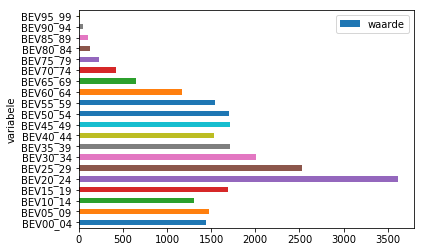

In [9]:
age_dist('DX20', 2017)

In [50]:
# Change in acceptance and tolerance of homosexuals
# LNEGAHO_P - neg homo
# O_OPLPO_L_P
# O_OPLPO_M_P
# O_OPLPO_P

def corr_edu_par_homo(region):
    dxareas_bbga = bbga.set_index('gebiedcode15')
    bev_mask = dxareas_bbga.variabele.str.contains('O_OPLPO_')
    
    age_groups = dxareas_bbga.loc[(bev_mask) & (dxareas_bbga.index == region)]
    age_groups = age_groups.reset_index()
    age_groups['jaar'] = pd.to_datetime(age_groups['jaar'], format='%Y')
#     age_groups = age_groups.set_index('jaar')

    age_groups = age_groups.groupby(['variabele', 'jaar']).sum()
    age_groups = age_groups.resample('A', level=1).asfreq()
    return age_groups
    
corr_edu_par_homo('DX20')
    
# df = df.reset_index()
# df['ts'] = pd.to_datetime(df['Timestamp'])
# # 'ts' is now datetime of 'Timestamp', you just need to set it to index
# df = df.set_index('ts')

ValueError: Upsampling from level= or on= selection is not supported, use .set_index(...) to explicitly set index to datetime-like